In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('(3)finalData.csv')

In [117]:
df

,INPATIENT_DATA_ID_x,DEPARTMENT_ID,DEPARTMENT_NAME,VISIT_TYPE,APPT_LENGTH,APPT_STATUS_NAME,CONTACT_DATE,APPT_DTTM,CHECKIN_DTTM,CHECKOUT_DTTM,...,INFUSION_START,INFUSION_END,CHAIR_OUT,ORDER_DESCRIPTION,ORDER_STATUS,CHAIR,Unnamed: 19,WAIT_ONE,WAIT_TWO,TOTAL_WAIT
0,APTT001,DEPT001,INFUSION Department,INFUSION 30 MIN,30,Arrived,10/31/21,2021-10-31 02:00PM,13:28:00,NaN,...,NaN,NaN,NaN,NaN,*Unspecified Order Status,Chair 1,NaN,12.0,NaN,NaN
1,APTT002,DEPT001,INFUSION Department,INFUSION 2 HR,150,Arrived,10/31/21,2021-10-31 12:00PM,12:21:00,NaN,...,NaN,NaN,NaN,NaN,*Unspecified Order Status,Chair 2,NaN,54.0,NaN,NaN
2,APTT003,DEPT001,INFUSION Department,INFUSION 4 HR,270,Arrived,10/31/21,2021-10-31 01:00PM,12:52:00,NaN,...,13:15:00,3:20 PM,NaN,ARSENIC TRIOXIDE IN D5W/NS 250 ML IVPB,Completed [5],Chair 2,NaN,23.0,0.0,23.0
3,APTT004,DEPT001,INFUSION Department,INFUSION 1 HR,90,Completed,10/31/21,2021-10-31 09:00AM,08:50:00,2021-10-31 12:41PM,...,11:15:00,11:55 AM,NaN,PEMBROLIZUMAB 200 MG IN NS 59 ML,Completed [5],Chair 3,NaN,30.0,115.0,145.0
4,APTT007,DEPT001,INFUSION Department,INFUSION 2 HR,120,Completed,10/31/21,10/31/21 10:30,10:19:00,2021-10-31 02:09PM,...,NaN,NaN,NaN,NaN,*Unspecified Order Status,Chair 3,NaN,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,APTT418,DEPT001,INFUSION Department,INFUSION 30 MIN,30,Arrived,11/4/21,2021-11-04 02:00PM,14:06:00,NaN,...,NaN,NaN,NaN,NaN,11/4,*Unspecified Order Status,Chair 18,44.0,NaN,NaN
271,APTT419,DEPT001,INFUSION Department,INFUSION 2 HR,150,Arrived,11/4/21,2021-11-04 01:30PM,14:12:00,NaN,...,15:45:00,5:00 PM,NaN,GEMCITABINE (AS 1 G/26.3 ML) IN NS INFUSION,11/4,Completed [5],Chair 9,18.0,75.0,93.0
272,APTT420,DEPT001,INFUSION Department,INFUSION 2 HR,150,Completed,11/4/21,2021-11-04 03:30PM,14:17:00,2021-11-04 03:53PM,...,16:00:00,3:40 PM,NaN,VINCRISTINE IN NS INFUSION,11/4,Completed [5],Chair 10,23.0,80.0,103.0
273,APTT422,DEPT001,INFUSION Department,INFUSION 5 HR,30,Arrived,11/4/21,2021-11-04 12:00PM,16:13:00,NaN,...,16:45:00,5:30 PM,NaN,SODIUM CHLORIDE 0.9 % BOLUS,11/4,Completed [5],Chair 18,17.0,15.0,32.0


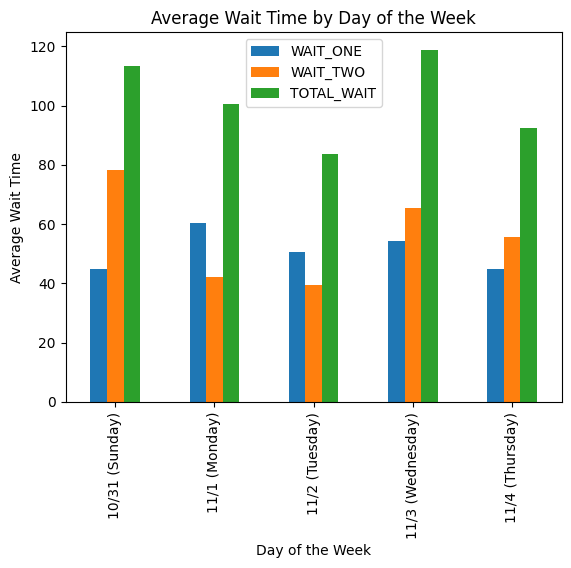

In [118]:
grouped = df.groupby('CONTACT_DATE').mean(numeric_only=True)

dates = df['CONTACT_DATE'].unique()

ax = grouped.iloc[:, -3:].plot(kind='bar')

labels = ['10/31 (Sunday)', '11/1 (Monday)', '11/2 (Tuesday)', '11/3 (Wednesday)', '11/4 (Thursday)']
ax.set_xticklabels(labels)

plt.xlabel('Day of the Week')
plt.ylabel('Average Wait Time')
plt.title('Average Wait Time by Day of the Week')

plt.show()